## Data Preprocessing

This script is for the extraction of important features. Besides, we ran some basic models, such as KNN, RandomForest, LogisticRegression, to check the data correlation.

In [272]:
import pandas as pd
import numpy as np

Apply LabelEncoder to convert categorical variables to dummy variables

In [273]:

from sklearn.calibration import LabelEncoder

train_df = pd.read_csv("train.csv").drop(["_c39"],axis="columns")

date_list = ['policy_bind_date','incident_date']

for val in date_list:
    train_df[val] = pd.to_datetime(train_df[val], format = '%Y-%m-%d')
train_df['delta_time'] = np.log((train_df['incident_date'] - train_df['policy_bind_date']).dt.days)
display(train_df)

f:\Python3.8.5\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,delta_time
0,187,37,125591,2013-08-08,IN,500/1000,1000,1412.06,5000000,450947,...,?,57700,5770,5770,46160,Nissan,Maxima,2000,0,6.265301
1,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,...,YES,51400,5140,10280,35980,Honda,Civic,1996,0,8.739056
2,24,33,649082,1996-01-19,IL,500/1000,1000,1922.84,0,431277,...,NO,46800,4680,9360,32760,Jeep,Wrangler,2002,0,8.845777
3,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,...,YES,68520,11420,5710,51390,Suburu,Legacy,2003,1,7.737180
4,85,30,190588,2001-12-09,OH,100/300,1000,796.35,0,614166,...,YES,58960,5360,10720,42880,Ford,F150,2004,0,8.480737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,199,37,982871,1997-07-27,IN,250/500,500,1262.08,0,474615,...,NO,60170,10940,10940,38290,Nissan,Pathfinder,2011,1,8.759982
696,232,43,751905,2001-05-16,OH,250/500,500,1483.91,8000000,431531,...,?,70600,7060,14120,49420,Volkswagen,Passat,2013,1,8.516193
697,215,37,761189,2002-12-28,IN,100/300,500,1632.93,0,614417,...,YES,57120,9520,4760,42840,Mercedes,C300,2002,0,8.398410
698,270,44,701521,2003-07-05,IL,500/1000,2000,1030.95,0,435985,...,NO,35900,7180,3590,25130,Audi,A3,2007,1,8.350194


In [274]:

train_df_cat = train_df.select_dtypes(exclude=["int64","float64"])
train_df_num = train_df.select_dtypes(include=["int64","float64"])
display(train_df_cat.head())

for column in train_df_cat.columns:
    train_df_cat[column] = LabelEncoder().fit_transform(train_df_cat[column])
unique_df = pd.DataFrame(train_df_cat.nunique()).reset_index()
display(unique_df)
unique_df = unique_df[unique_df[0]<=13]
display(train_df_cat[unique_df["index"]])
train_df = pd.concat([train_df_num,train_df_cat[unique_df["index"]]],axis='columns')
train_df.dropna(how='any',axis=0,inplace=True)

display(train_df.head())

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
0,2013-08-08,IN,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2015-01-16,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,7082 Oak Ridge,?,?,Nissan,Maxima
1,1997-12-25,IL,250/500,MALE,JD,craft-repair,polo,other-relative,2015-01-27,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,9352 Washington Ave,?,YES,Honda,Civic
2,1996-01-19,IL,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-24,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,5061 Francis Ave,?,NO,Jeep,Wrangler
3,2008-10-28,OH,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,2457 Washington Ave,YES,YES,Suburu,Legacy
4,2001-12-09,OH,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-20,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,2290 4th Ave,YES,YES,Ford,F150


,index,0
0,policy_bind_date,673
1,policy_state,3
2,policy_csl,3
3,insured_sex,2
4,insured_education_level,7
5,insured_occupation,14
6,insured_hobbies,20
7,insured_relationship,6
8,incident_date,60
9,incident_type,4


,policy_state,policy_csl,insured_sex,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available
0,1,2,0,5,1,2,3,2,0,0,5,0,0
1,0,1,1,3,2,0,3,1,3,0,6,0,2
2,0,2,0,2,5,2,3,2,4,6,3,0,1
3,2,2,1,3,3,0,1,0,1,6,3,2,2
4,2,0,0,4,3,0,2,2,1,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,1,1,3,5,2,1,0,0,0,1,0,1
696,2,1,1,1,0,0,2,0,0,1,0,1,0
697,1,0,0,1,1,0,2,1,1,4,5,1,2
698,0,2,0,0,2,0,2,0,0,0,3,0,1


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available
0,187,37,125591,1000,1412.06,5000000,450947,60100,0,21,...,5,1,2,3,2,0,0,5,0,0
1,243,44,967713,500,809.11,0,600208,33200,0,4,...,3,2,0,3,1,3,0,6,0,2
2,24,33,649082,1000,1922.84,0,431277,0,-45200,0,...,2,5,2,3,2,4,6,3,0,1
3,215,42,519312,500,1848.81,0,435489,0,-49000,20,...,3,3,0,1,0,1,6,3,2,2
4,85,30,190588,1000,796.35,0,614166,72400,-77000,9,...,4,3,0,2,2,1,4,3,2,2


In [275]:
import statsmodels.api as sm
y = train_df["fraud_reported"].tolist()
X = train_df.drop(["fraud_reported"],axis="columns")
X_lm = X
X_lm = sm.add_constant(X_lm)
display(X_lm.shape,y.__len__())
res = sm.OLS(y,X_lm).fit()
display(res.summary())

(699, 33)

699

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.013
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.92e-16
Time:                        21:31:06   Log-Likelihood:                -341.68
No. Observations:                 699   AIC:                             747.4
Df Residuals:                     667   BIC:                             892.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3206      5.250     -0.061      0.951     -10.630       9.989
months_as_customer           5.709e-05      0.000      0.164      0.870      -0.001       0.001
age                            -0.0017      0.004     -0.385      0.701      -0.010       0.007
policy_number               -3.229e-08   6.01e-08     -0.537      0.591    -1.5e-07    8.57e-08
policy_deductable            3.879e-05   2.56e-05      1.518      0.129   -1.14e-05     8.9e-05
policy_annual_premium       -3.751e-06   6.29e-05     -0.060      0.952      -0.000       0.000
umbrella_limit               5.493e-09   6.84e-09      0.803      0.422   -7.94e-09    1.89e-08
insured_zip                  7.511e-08   2.16e-07      0.349      0.728   -3.48e-07    4.98e-07
capital-gains               -6.479e-07   5.56e-07     -1.166      0.244   -1.74e-06    4.43e-07
capital-loss                -4.691e-07   5.51e-07     -0.851      0.395   -1.55e-06    6.13e-07
incident_hour_of_the_day       -0.0016      0.002     -0.675      0.500      -0.006       0.003
number_of_vehicles_involved    -0.0049      0.033     -0.148      0.883      -0.071       0.061
bodily_injuries                 0.0218      0.019      1.150      0.251      -0.015       0.059
witnesses                       0.0294      0.014      2.087      0.037       0.002       0.057
total_claim_amount          -2.497e-06   1.35e-06     -1.855      0.064   -5.14e-06    1.46e-07
injury_claim                -6.548e-06   3.87e-06     -1.691      0.091   -1.41e-05    1.05e-06
property_claim              -2.128e-06   3.97e-06     -0.536      0.592   -9.92e-06    5.66e-06
vehicle_claim                6.179e-06   2.54e-06      2.433      0.015    1.19e-06    1.12e-05
auto_year                       0.0003      0.003      0.113      0.910      -0.005       0.005
delta_time                      0.0132      0.015      0.858      0.391      -0.017       0.044
policy_state                    0.0181      0.019      0.962      0.337      -0.019       0.055
policy_csl                     -0.0196      0.020     -1.003      0.316      -0.058       0.019
insured_sex                     0.0235      0.031      0.752      0.452      -0.038       0.085
insured_education_level         0.0092      0.008      1.159      0.247      -0.006       0.025
insured_relationship            0.0088      0.009      0.947      0.344      -0.009       0.027
incident_type                   0.0002      0.032      0.008      0.994      -0.063       0.063
collision_type                 -0.0057      0.019     -0.302      0.763      -0.043       0.031
incident_severity              -0.1831      0.018    -10.319      0.000      -0.218      -0.148
authorities_contacted           0.0068      0.010      0.655      0.513      -0.014       0.027
incident_st

## PCA for dimensionality reduction

PCA is somehow of great assistance to the improvement of model training. Therefore, we performed PCA transformation to explore the possibility of melioration.

1. Find the most suitable component number

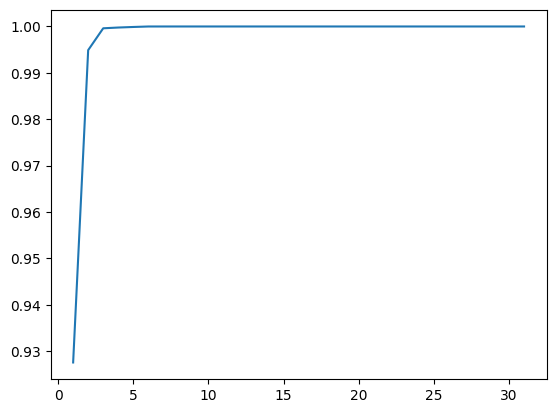

30 components are suitable


In [276]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_comp_x = X.columns.nunique()
n_comp = [com for com in range(1,n_comp_x)]

for com in n_comp:
    pca = PCA(n_components=com).fit(X.T)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(n_comp,cumsum)
plt.show()

for idx,item in enumerate(cumsum):
    if item == cumsum.max():
        print(f"{idx} components are suitable")
        break

2. We found that 16 components are suitable

In [283]:
pca = PCA(n_components=7).fit(X.T)
print(np.cumsum(pca.explained_variance_ratio_))
X_pca = pca.components_.T
res = sm.OLS(y,X_pca).fit()
print(res.summary())

[0.92757909 0.99490157 0.99960943 0.99977369 0.99989266 0.999996
 0.99999841]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.285
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              39.45
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    1.04e-46
Time:                        21:32:57   Log-Likelihood:                         -402.25
No. Observations:                 699   AIC:                                      818.5
Df Residuals:                     692   BIC:                                      850.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          